# Lab: Dimensionality Reduction
Data Mining 2018/2019 <br> Mirco Kroon and Gosia Migut

**WHAT** This optional lab consists of several programming and insight exercises/questions. 
These exercises are ment to let you practice with the theory covered in: Chapter 11 (section 4) from "Mining of Massive Datasets" by J. Leskovec, A. Rajaraman, J. D. Ullman.

**WHY** Practicing, both through programming and answering the insight questions, aims at deepening your knowledge and preparing you for the exam. 

**HOW** Follow the exercises in this notebook either on your own or with a friend. Use Mattermost
to disscus questions with your peers. For additional questions and feedback please consult the TA's at the assigned lab session. The answers to these exercises will not be provided. 

**SUMMARY** In the following two exercises you will create an algorithm to perform CUR decomposition on
datasets. Afterwards you can compare the performance of CUR decomposition to regular Singular Value Decomposition.


This excercise is based on CUR-decomposition as described in section 11.4 of the course book. It is required that you read this section before making this assignment. You can use the example in the book to validate your solution.

# Exercise 1: implementing CUR
## Step 0:
For our input, we will use the example from the book. Note that your answers may differ due to the probabilistic nature of the algorithm. Using a fixed random seed may help to make your solutions consistent.

Below is the dataset of film ratings we we will be using:
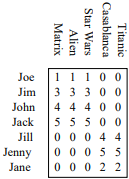

A matrix of this data is given below.

In [ ]:
import numpy as np
import time

M = np.matrix([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 0, 0, 4, 4],
    [0, 0, 0, 5, 5], 
    [0, 0, 0, 2, 2]   
])

print(M)

## Step 1:
To make our CUR-decomposition, we will create our three matrices one at a time, starting with matrix `C`. Matrix `C` consists of columns from `M`, chosen based on a weighed probability distribution such that more 'important' columns have a higher chance of being chosen.

First we need to compute our weighed probabilities so that we can use this later to select our columns. The probability for each column is computed by the sum of squares of the values in the column, divided by the sum of squares of all values in the matrix. For example, the first column in the example will have a probability of 51/243 = 0.210.

Below, implement the function so that the output is an array of probabilities for each of the columns.

In [ ]:
def compute_column_probabilities(M):
    probabilities = np.zeros(M.shape[1])
    
    # Start coding here!
    
    return probabilities

compute_column_probabilities(M)

## Question 1

Why is it necessary to compute these probabilities? What do they tell us?

## Step 2:
Now we will use the probability distribution to randomly select $r$ columns for our matrix $C$, such that columns with a higher probability value have a higher chance of being picked.

Then we must scale these columns by their probability of being chosen. This probability is given by $\sqrt{r * p}$, where $r$ is the number of columns we are selecting and $p$ is the probability of this particular column. For example, let's say we take a sample of 2 columns ($r = 2$). For our first column of $C$, we might get the first column of $M$, which will then be divided by $\sqrt{2 * 0.210}$ to get our final column for $C$.

Implement the function below to randomly select $r$ columns from the matrix $M$, and then place the scaled columns in output matrix $C$. **The function must return both the matrix $C$ and the indices for the selected colums, as these will be needed later.**

**Hint: You can use the `numpy.random.choice` function to choose the columns based on the probabilities**

In [ ]:
from numpy.random import choice
import math

def construct_c(M, r):
    C = np.zeros([M.shape[0], r]) 
    
    # Start coding here!
    
    #Replace this with your implementation!
    columns = []
    
    return C, columns

C, columns = construct_c(M, 2)
print(C, columns)

## Step 3:
Now complete the implementation of $R$ similar to matrix $C$. Again, the function must return both the matrix $R$ and the indices for the selected rows.

**Hint: this may be significantly fewer lines of code now that you have already implemented `construct_c`**

In [ ]:
def construct_r(M, r):
    
    # Start coding here!
    
    # Replace this with your implementation!
    return np.zeros([r, M.shape[1]])
    
R, rows = construct_r(M, 2)
print(R, rows)

## Step 4:
To complete our CUR decomposition, we need to compute matrix $U$. The input for this function will include the indices for the selected rows and columns from the construction of matrices $C$ and $R$.

Matrix $U$ will be based on another matrix $W$, both of which will be $r ✕ r$ matrices. For matrix $W$, the value of element $(i, j)$ will be the value in matrix $M$ from the $i$th selected row, and the $j$th selected column. For example, if our first column of $C$ was column 2, and our first row of $R$ was row 3, then the value of the first (top-left) element in matrix $W$ will be 4.

Below, complete the function by implementing the construction of matrix $W$.

In [ ]:
def construct_u(M, r, rows, columns):
    W = np.zeros([r, r])
    
    # Start coding here!
      
    # compute U from W
    X, E, Yt = np.linalg.svd(W)
    E =  np.linalg.pinv(np.diag(E)) ** 2
    U = np.matmul(np.matmul(Yt.T, E), X.T)    
    
    return U
    
construct_u(M, 2, rows, columns)

## Step 5:
Now that we can compute all three matrices, we can compute our final CUR matrix by computing $C ✕ U ✕ R$. Complete the function below by adding the computations for $C$, $R$ and $U$.

In [ ]:
def cur(M, r):
    
    # Start coding here!
    
    # Replace this with your implementation!
    C = []
    R = []
    U = []
    
    return C, U, R
    # Alternatively, you can return the result of multiplying the three matrices together:
    # return np.matmul(np.matmul(C, U), R)

cur(M, 7)

# Exercise 2: performance comparison
## Step 1:
Now that we have implemented CUR decomposition, we should compare the efficiency of this algorithm compared to regular SVD. First, let's generate some random data. Complete the `set_value` lambda function below to generate a large sparse matrix with random ratings between 1 and 5.

In [ ]:
density = 0.10
width = 1000
height = 10000

def generate_sparse_matrix(density, width, height):
    M = np.zeros([width, height])
    
    # Start coding here!
    set_value = lambda x: 0
    
    return np.vectorize(set_value)(M)

print("Generating data ...")
M = generate_sparse_matrix(density, width, height)
print("Done!")

## Step 2:
Now let's use this generated matrix to compare the running time of the two algorithms. Run both of them below and compare the results.

In [ ]:
print("Running SVD decomposition ...")
start = time.time()

np.linalg.svd(M)

print("Completed in: " + str(round(time.time() - start, 2)) + " seconds")

In [ ]:
print("Running CUR decomposition ...")
start = time.time()

r = 500
cur(M, r)

print("Completed in: " + str(round(time.time() - start, 2)) + " seconds")

### Question 1:
What is the effect of changing the value of $r$ on the running time of the algorithm? 

### Question 2:
What factors might go into deciding a suitable value of $r$ besides the running time?

### Question 3: 
What do you think might be a realistic value for $r$ for the generated matrix?